# NOTEBOOK D'EXPLOITATION DES MODELES ENTRAINES
Dans ce notebook on... exploite des modèles préentrainés.
Un modèle préentrainé est disponible à l'[adresse suivante](https://filesender.renater.fr/?s=download&token=413fa625-51f0-bd9e-67c3-979f9440dbb4).
Il a été généré avec la commande ```python VAE_MNIST.py --cuda```, et entraîné sur un nombre incroyable de 1 EPOCH. C'est tout pourri mais c'est en attendant d'avoir un ```/home/``` sur **laphroaig**.

Amusez vous les cocos on est là pour ça.

In [7]:
import torch
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import transforms
model = torch.load("model_reduced_sum.torch", map_location="cpu")

In [8]:
testset = MNIST(root='./MNIST/',
                train=False,
                transform=transforms.ToTensor(),
                download=True)

In [9]:
img = testset[10][0]

In [10]:
def show(img):
    plt.imshow(img.squeeze(0).detach().numpy(), cmap="Greys")
    plt.axis("off")

In [11]:
forward = lambda img: model.decode(model.sample(*model.encode(img)))

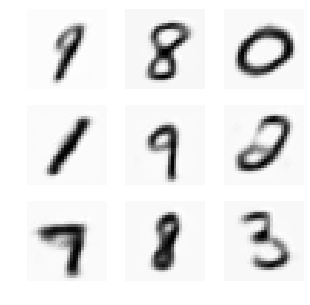

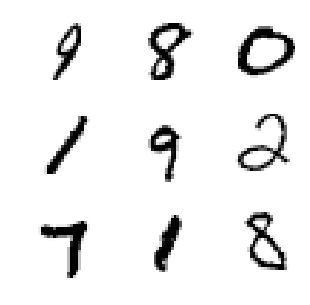

In [12]:
plt.figure(figsize=(5,5))

size = 3

tirage = np.random.randint(0,10000,size**2)

for i in range(size**2):
    plt.subplot(size,size,i+1)
    show(forward(testset[tirage[i]][0]).squeeze(0))

plt.show()

plt.figure(figsize=(5,5))


for i in range(size**2):
    plt.subplot(size,size,i+1)
    show(testset[tirage[i]][0])

plt.show()